In [1]:
import requests
import pandas as pd
import json

In [2]:
api_key = ''

# here we get all the details we need except for the website of the places.
def get_all_details(query):
    res = requests.get(f'https://maps.googleapis.com/maps/api/place/textsearch/json?query={query}&key={api_key}')
    x = json.loads(res.text)
    y = x['results']
    return y

In [3]:
places = []
# calling the above function to store all the places in the 'places' list
for _ in ['stores,Indianapolis','cafes,Indianapolis','things to do,Indianapolis','parks,Indianapolis','food,Indianapolis','restaurants,Indianapolis','museums,Indianapolis']:
    places.extend(get_all_details(_))

In [4]:
# function to get websites
def get_websites(places):
    for i in range(len(places)):
        url = f"https://maps.googleapis.com/maps/api/place/details/json?place_id={places[i]['place_id']}&key={api_key}"

        payload={}
        headers = {}

        response = requests.request("GET", url, headers=headers, data=payload)

        places[i]['details'] = response.json()['result']
get_websites(places)

In [ ]:
df = pd.DataFrame()
# creating a dataframe out of the above json of places
for _ in places:
    df = df.append(_,ignore_index=True)

In [6]:
df.head(6)

,business_status,formatted_address,geometry,icon,icon_background_color,icon_mask_base_uri,name,opening_hours,photos,place_id,plus_code,rating,reference,types,user_ratings_total,details,price_level
0,OPERATIONAL,"10202 E Washington St Suite 800, Indianapolis,...","{'location': {'lat': 39.77812490000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,#4B96F3,https://maps.gstatic.com/mapfiles/place_api/ic...,Resell Indy,{'open_now': True},"[{'height': 721, 'html_attributions': ['<a hre...",ChIJYfIXDMBJa4gRoArANFdbQwE,"{'compound_code': 'Q2H7+6G Indianapolis, India...",4.8,ChIJYfIXDMBJa4gRoArANFdbQwE,"[bicycle_store, furniture_store, electronics_s...",226,{'address_components': [{'long_name': 'Suite 8...,NaN
1,OPERATIONAL,"431 Massachusetts Ave, Indianapolis, IN 46204,...","{'location': {'lat': 39.7732155, 'lng': -86.15...",https://maps.gstatic.com/mapfiles/place_api/ic...,#4B96F3,https://maps.gstatic.com/mapfiles/place_api/ic...,Sage Boutique,{'open_now': False},"[{'height': 3025, 'html_attributions': ['<a hr...",ChIJ7R-QxpRQa4gROoaT_OWgFK8,"{'compound_code': 'QRFX+7F Indianapolis, India...",3.5,ChIJ7R-QxpRQa4gROoaT_OWgFK8,"[clothing_store, store, point_of_interest, est...",8,"{'address_components': [{'long_name': '431', '...",NaN
2,OPERATIONAL,"50 N Illinois St, Indianapolis, IN 46204, Unit...","{'location': {'lat': 39.7681947, 'lng': -86.16...",https://maps.gstatic.com/mapfiles/place_api/ic...,#4B96F3,https://maps.gstatic.com/mapfiles/place_api/ic...,T.J. Maxx,{'open_now': True},"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJ5_QjCLxQa4gR3Mv5MUbcaZo,"{'compound_code': 'QR9Q+7X Indianapolis, India...",4.1,ChIJ5_QjCLxQa4gR3Mv5MUbcaZo,"[department_store, jewelry_store, clothing_sto...",1027,"{'address_components': [{'long_name': '50', 's...",1.0
3,OPERATIONAL,"10202 E Washington St, Indianapolis, IN 46229,...","{'location': {'lat': 39.7771842, 'lng': -85.98...",https://maps.gstatic.com/mapfiles/place_api/ic...,#4B96F3,https://maps.gstatic.com/mapfiles/place_api/ic...,Target,{'open_now': True},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJlemUMulIa4gRitjr2v3bwKo,"{'compound_code': 'Q2G7+VJ Indianapolis, India...",4.2,ChIJlemUMulIa4gRitjr2v3bwKo,"[department_store, furniture_store, electronic...",242,"{'address_components': [{'long_name': '10202',...",2.0
4,OPERATIONAL,"434 Massachusetts Ave, Indianapolis, IN 46204,...","{'location': {'lat': 39.7733294, 'lng': -86.15...",https://maps.gstatic.com/mapfiles/place_api/ic...,#4B96F3,https://maps.gstatic.com/mapfiles/place_api/ic...,Silver In the City,{'open_now': True},"[{'height': 3264, 'html_attributions': ['<a hr...",ChIJPa20z5RQa4gRBxopfp56RIk,"{'compound_code': 'QRFX+98 Indianapolis, India...",4.7,ChIJPa20z5RQa4gRBxopfp56RIk,"[home_goods_store, jewelry_store, store, point...",414,"{'address_components': [{'long_name': '434', '...",NaN
5,OPERATIONAL,"845B Massachusetts Ave, Indianapolis, IN 46204...","{'location': {'lat': 39.7785344, 'lng': -86.14...",https://maps.gstatic.com/mapfiles/place_api/ic...,#4B96F3,https://maps.gstatic.com/mapfiles/place_api/ic...,Boomerang Boutique,{'open_now': False},"[{'height': 960, 'html_attributions': ['<a hre...",ChIJ60o7A_JQa4gRu7FHqHA__54,"{'compound_code': 'QVH4+CG Indianapolis, India...",4.9,ChIJ60o7A_JQa4gRu7FHqHA__54,"[home_goods_store, clothing_store, store, poin...",72,"{'address_components': [{'long_name': '845B', ...",NaN


In [21]:
# droping unnecessary columns
df = df.drop(columns=['business_status','geometry', 'icon', 'icon_background_color', 'icon_mask_base_uri', 'opening_hours', 'photos', 'place_id', 'plus_code', 'reference', 'user_ratings_total', 'price_level'])

In [ ]:
#extracting all websites from the details column
for _ in range(len(df['details'])):
    if 'website' not in df['details'][_].keys():
        df['details'][_] = None
    else:
        df['details'][_] = df['details'][_]['website']

In [23]:
# renaming the details column to website
df.rename(columns = {'details':'website'}, inplace = True)

In [24]:
# droping null values
df = df.dropna()

In [25]:
# checking if null values are removed or not
df.isnull().sum()

formatted_address    0
name                 0
rating               0
types                0
website              0
dtype: int64

In [26]:
# resetting index after droping columns
df = df.reset_index()
df = df.drop(columns=['index'])

In [27]:
# printing set of list of idividual categories present in the types column
print(set(sum((list(df['types'])),[])))

{'meal_delivery', 'bicycle_store', 'hardware_store', 'tourist_attraction', 'museum', 'clothing_store', 'department_store', 'meal_takeaway', 'restaurant', 'store', 'establishment', 'furniture_store', 'grocery_or_supermarket', 'bakery', 'art_gallery', 'home_goods_store', 'park', 'point_of_interest', 'library', 'food', 'jewelry_store', 'electronics_store', 'aquarium', 'bar', 'shoe_store', 'cafe', 'school', 'zoo'}


In [ ]:
# re naming the category the  datapoint belongs to
for _ in range(len(df['types'])):
    if 'tourist_attraction' in df['types'][_] or 'museum' in df['types'][_] or 'aquarium' in df['types'][_] or 'art_gallery' in df['types'][_] or 'library' in df['types'][_] or 'park' in df['types'][_] or 'school' in df['types'][_] or 'zoo' in df['types'][_]:
        df['types'][_] = 'Tour'
    elif 'clothing_store' in df['types'][_] or 'department_store' in df['types'][_] or 'jewelry_store' in df['types'][_] or 'store' in df['types'][_] or 'grocery_or_supermarket' in df['types'][_] or 'electronics_store' in df['types'][_] or 'furniture_store' in df['types'][_] or 'home_goods_store' in df['types'][_] or 'shoe_store' in df['types'][_]: 
        df['types'][_] = 'Shopping'
        
    elif 'food' in df['types'][_] or 'bar' in df['types'][_] or 'meal_delivery' in df['types'][_] or 'meal_takeaway' in df['types'][_] or 'restaurant' in df['types'][_]:
        df['types'][_] = 'Food'

In [29]:
# final dataframe
df.head(6)

,formatted_address,name,rating,types,website
0,"10202 E Washington St Suite 800, Indianapolis,...",Resell Indy,4.8,Shopping,http://www.resellindy.com/
1,"431 Massachusetts Ave, Indianapolis, IN 46204,...",Sage Boutique,3.5,Shopping,http://sagemassave.tumblr.com/
2,"50 N Illinois St, Indianapolis, IN 46204, Unit...",T.J. Maxx,4.1,Shopping,https://tjmaxx.tjx.com/store/index.jsp
3,"10202 E Washington St, Indianapolis, IN 46229,...",Target,4.2,Shopping,https://www.target.com/sl/washington-square/1214
4,"434 Massachusetts Ave, Indianapolis, IN 46204,...",Silver In the City,4.7,Shopping,http://www.silverinthecity.com/
5,"845B Massachusetts Ave, Indianapolis, IN 46204...",Boomerang Boutique,4.9,Shopping,https://www.boomerangboutique.com/


EDA

In [14]:
import seaborn as sns

<AxesSubplot: xlabel='rating', ylabel='Count'>

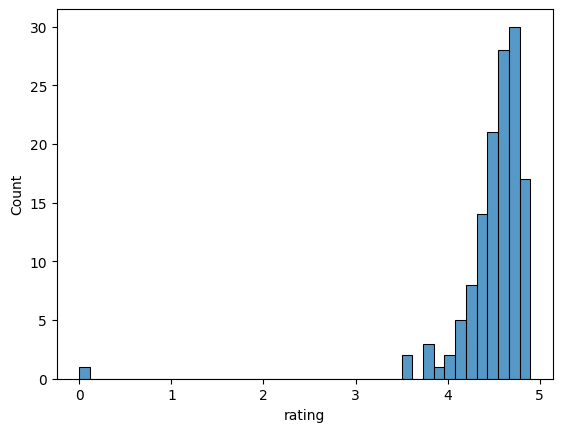

In [15]:
sns.histplot(x=df["rating"])

<AxesSubplot: xlabel='rating', ylabel='types'>

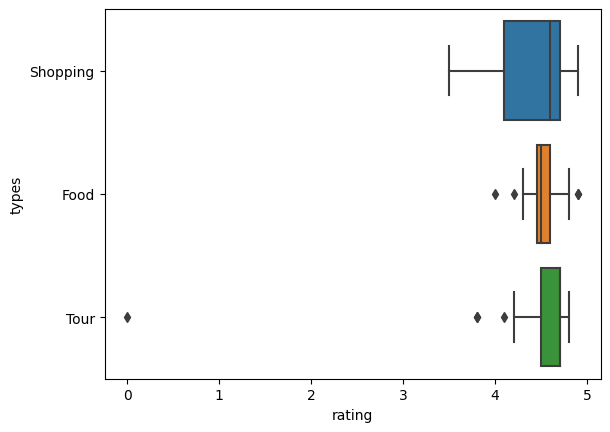

In [16]:
sns.boxplot(x=df["rating"], y=df["types"])

In [17]:
df = df.loc[df['rating'] != 0]

<AxesSubplot: xlabel='rating', ylabel='types'>

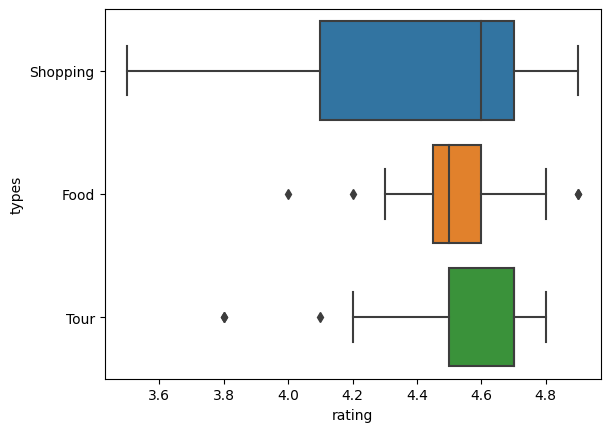

In [18]:
sns.boxplot(x=df["rating"], y=df["types"])